# Create a CNN for Image Classification on the Fashion MNIST Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

2023-06-15 15:43:06.629554: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-15 15:43:06.629571: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dataset = tf.keras.datasets.fashion_mnist

In [3]:
(XTrain, yTrain), (XTest, yTest) = dataset.load_data()

In [4]:
XTrain.shape, yTrain.shape

((60000, 28, 28), (60000,))

Label: 8
Image Pixel Values:
[[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117   0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167 159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0 174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0   0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2   0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2   0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0   4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   5   1   0   0 157  98   0   2   0  

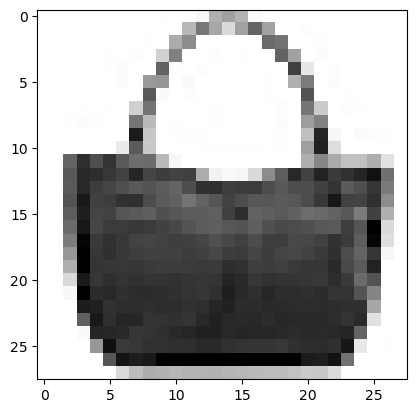

In [5]:
imageIndex = 100

np.set_printoptions(linewidth=300)

imageLabel = yTrain[imageIndex]
imagePixels = XTrain[imageIndex]

print(f'Label: {imageLabel}\nImage Pixel Values:\n{imagePixels}')
plt.imshow(imagePixels, cmap='Greys')

In [6]:
XTrain = XTrain / 255.0
XTest = XTest / 255.0

In [7]:
tf.keras.layers.Flatten??

Init signature: tf.keras.layers.Flatten(data_format=None, **kwargs)
Source:        
@keras_export('keras.layers.Flatten')
class Flatten(Layer):
  """Flattens the input. Does not affect the batch size.

  Note: If inputs are shaped `(batch,)` without a feature axis, then
  flattening adds an extra channel dimension and output shape is `(batch, 1)`.

  Args:
    data_format: A string,
      one of `channels_last` (default) or `channels_first`.
      The ordering of the dimensions in the inputs.
      `channels_last` corresponds to inputs with shape
      `(batch, ..., channels)` while `channels_first` corresponds to
      inputs with shape `(batch, channels, ...)`.
      It defaults to the `image_data_format` value found in your
      Keras config file at `~/.keras/keras.json`.
      If you never set it, then it will be "channels_last".

  Example:

  >>> model = tf.keras.Sequential()
  >>> model.add(tf.keras.layers.Conv2D(64, 3, 3, input_shape=(3, 32, 32)))
  >>> model.output_shape
  (N

In [8]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(
            input_shape=(28, 28)
        ),
        tf.keras.layers.Dense(
            128, 
            activation=tf.nn.relu
        ),
        tf.keras.layers.Dense(
            10, 
            activation=tf.nn.softmax
        )
    ]
)

2023-06-15 15:43:08.727160: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-15 15:43:08.727392: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-15 15:43:08.727449: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-06-15 15:43:08.727485: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-06-15 15:43:08.727520: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    # These'll show at the side of each epoch in the training output
    metrics=['Accuracy']
)

In [11]:
EPOCHS = 20

model.fit(XTrain, yTrain, epochs=EPOCHS)

Epoch 1/20
1875/1875 [==============================] - 2s 979us/step - loss: 0.4968 - Accuracy: 0.8255
Epoch 2/20
1875/1875 [==============================] - 2s 843us/step - loss: 0.3768 - Accuracy: 0.8635
Epoch 3/20
1875/1875 [==============================] - 2s 902us/step - loss: 0.3369 - Accuracy: 0.8776
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3133 - Accuracy: 0.8833
Epoch 5/20
1875/1875 [==============================] - 2s 977us/step - loss: 0.2944 - Accuracy: 0.8906
Epoch 6/20
1875/1875 [==============================] - 2s 907us/step - loss: 0.2802 - Accuracy: 0.8953
Epoch 7/20
1875/1875 [==============================] - 2s 847us/step - loss: 0.2682 - Accuracy: 0.9003
Epoch 8/20
1875/1875 [==============================] - 2s 849us/step - loss: 0.2583 - Accuracy: 0.9026
Epoch 9/20
1875/1875 [==============================] - 2s 819us/step - loss: 0.2484 - Accuracy: 0.9080
Epoch 10/20
1875/1875 [==============================] - 2s 852us/